### Регулярные Выражения

Очень удобны когда условия поиска подстроки в строке, замены строк требуют гибкости

In [1]:
import re

### 1. Основные Методы

- **re.match( pattern, string )** - ищет указанный образец в строке. Если не находит, возвращается None иначе - **match object**
</br>

- **match_obj.group()** - возвращает группы найденных образцов
- **match_obj.start()** - возвращает начальный индекс первого вхождения искомого образца
- **match_obj.end()** - возвращает индекс последнего вхождения искомого образца
</br>
- **re.search( pattern, string )** - ищет искомый образец в строке. Однако, возвращает только первое вхождение. Взвращает **match object** 
- **re.findall( pattern, string )** - ищет искомый образец в строке. Возвращает все вхождения искомой подстроки. **Returns list**
- **re.split( delimeter, string )** - Разбивает строку согласно разделителю. **Maxsplit** определяет сколько раз необходимо разбить строку
- **re.sub( old_word, new_word, string )** - Заменяет подстроку на указанную
- **re.compile(pattern, repl, string)** - создает объект регулярного выражения (искомый паттерн), который затем можно использовать

### 2. Special Symbols for Regular Expressions
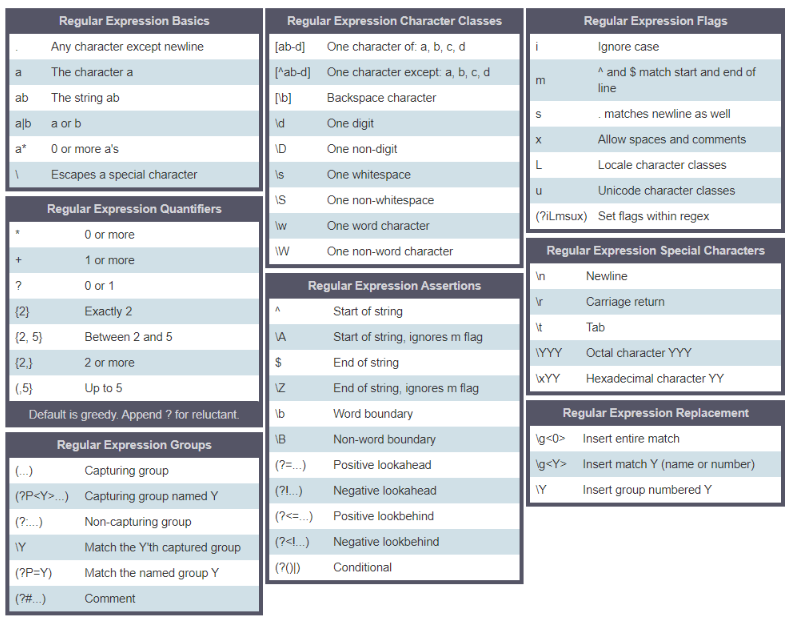

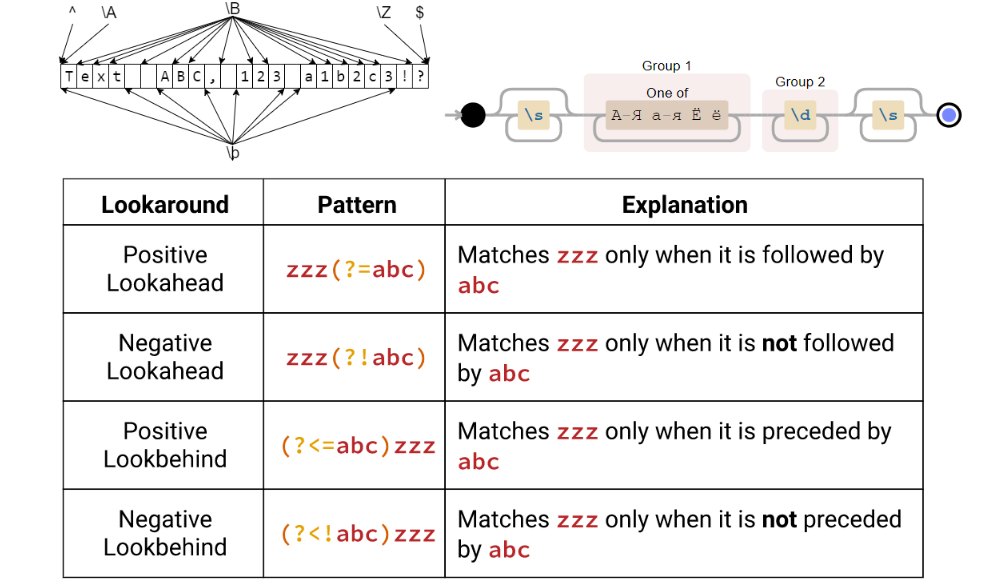

### re.match

In [3]:
res = re.match(r'CV','CV stands for Cross Validation') # r'CV' r indicates that the row is raw
print('Found Pattern: ', res.group())
print('Start index: ', res.start())
print('End index: ', res.end())

Found Pattern:  CV
Start index:  0
End index:  2


### re.search

In [4]:
res = re.search(r'like','I like doing what I like')
res.group() # found only first word

'like'

### re.findall

In [5]:
res = re.findall(r'like','I like doing what I like')
res

['like', 'like']

### re.split

In [6]:
res = re.split(r'o', 'Python is not tough',maxsplit=1)
res

['Pyth', 'n is not tough']

### re.sub

In [7]:
res = re.sub(r't','$','K2 is the highest mountain in Pakistan')
res

'K2 is $he highes$ moun$ain in Pakis$an'

### re.compile

In [8]:
pattern = re.compile('K2')
sentence = 'K2 is the highest mountain in Pakistan'
pattern.findall(sentence)

['K2']

### Regular Expressions Exercises

In [10]:
# Extract first word of a string
sentence = 'AV is largest Analytics community of India'
res = re.findall(r'^\w+',sentence)
print('First word of the sentence: ',res)

# Extract last word of a string
res = re.findall(r'\w+$',sentence)
print('Last word of a sentence: ',res)

First word of the sentence:  ['AV']
Last word of a sentence:  ['India']


In [11]:
# Return first two symbols of every word in the sentence
res = re.findall(r'\b\w\w',sentence)
print(res)

['AV', 'is', 'la', 'An', 'co', 'of', 'In']


In [12]:
# Return domen names from emails 
mails = 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz'

res_1 = re.findall(r'@\w+.(\w+)',mails)
res_2 = re.findall(r'@\w+.\w+',mails)
print('First Option: ',res_1)
print('Second Option: ',res_2)

First Option:  ['com', 'in', 'com', 'biz']
Second Option:  ['@gmail.com', '@test.in', '@analyticsvidhya.com', '@rest.biz']


In [13]:
# Extract Date
dates = 'Amit 34-3456 12-05-2007, XYZ 56-4532 11-11-2011, ABC 67-8945 12-01-2009'
res_1 = re.findall(r'\d{2}-\d{2}-\d{4}', dates)
res_2 = re.findall(r'\d{2}-(\d{2})-\d{4}', dates)
res_3 = re.findall(r'\d{2}-\d{2}-(\d{4})', dates)
print(f'Full Date: {res_1[0]}\nOnly Month: {res_2[0]}\nOnly Year: {res_3[0]}')

Full Date: 12-05-2007
Only Month: 05
Only Year: 2007


In [14]:
# Extract words that starts with vowel
text = 'AV is largest Analytics community of India'
res_1 = re.findall(r'\b[aeiouAEIOU]\w+', text)
res_2 = re.findall(r'\b[^aeiouAEIOU ]\w+', text)
print(f'Starts with vowels: {res_1}\nStarts with consonant: {res_2}')

Starts with vowels: ['AV', 'is', 'Analytics', 'of', 'India']
Starts with consonant: ['largest', 'community']


In [15]:
#Check tel nuber
phone_numbers = ['+7-(982)-444-12-23', '+7-(902)-837-10-21', '+49-178-2954524','+39-339-5696712','2342344534534']

def get_phone_number_info(phone):
    if re.findall(r'[+7]{2}-[(9]{2}[0-9)]{3}-[0-9]{3}-[0-9]{2}-[0-9]{2}',phone):
        print('From Russia')
        print('Phone number is valid')
    elif re.findall(r'[+4]{2}[9]{1}-[0-9]{3}-[0-9]{7}',phone):
        print('From Germany')
        print('Phone number is valid')
    elif re.findall(r'[+3]{2}[9]{1}-[0-9]{3}-[0-9]{7}',phone):
        print('From Italy')
        print('Phone number is valid')
    else:
        print('Unknow phone')

for phone in phone_numbers:
    get_phone_number_info(phone)

From Russia
Phone number is valid
From Russia
Phone number is valid
From Germany
Phone number is valid
From Italy
Phone number is valid
Unknow phone


In [16]:
# Split a string with several delimeters
line = 'asdf fjdk;afed,fjek,asdf,foo' # It is impossible to use split() as it allows to split only once

clean_line = re.split(r'[\s;,]',line)
print(clean_line)

['asdf', 'fjdk', 'afed', 'fjek', 'asdf', 'foo']


In [17]:
# Extract info from HTML file
html_text = '1NoahEmma2LiamOlivia3MasonSophia4JacobIsabella5WilliamAva6EthanMia7MichaelEmily'
res_1 = re.findall(r'([A-Z][A-Za-z]+)([A-Z][A-Za-z]+)',html_text)
res_2 = re.findall(r'\d',html_text)
print('Only names: ',res_1[:5])
print('Only numbers: ', res_2)

Only names:  [('Noah', 'Emma'), ('Liam', 'Olivia'), ('Mason', 'Sophia'), ('Jacob', 'Isabella'), ('William', 'Ava')]
Only numbers:  ['1', '2', '3', '4', '5', '6', '7']


In [18]:
### String Cleaning 
text = 'Mary45456456said****Vlad !!!was @ coming back home. Vlad knows the way home`````'
res = re.split(r'[\d*\s!`@]',text)
clean_txt = ' '.join(res)
clean_txt = clean_txt.split()
clean_txt = ' '.join(clean_txt)
print(f'Original Dirty Message: {text}\nClean Message: {clean_txt}')

Original Dirty Message: Mary45456456said****Vlad !!!was @ coming back home. Vlad knows the way home`````
Clean Message: Mary said Vlad was coming back home. Vlad knows the way home


- Resources: https://regex101.com/
- https://www.debuggex.com/#cheatsheet (debugger)